<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/Nearest_Neighbour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

# Origin point
orig = Point(1, 1.67)

# Destination points
dest1 = Point(0, 1.45)
dest2 =Point(2, 2)
dest3 = Point(0, 2.5)

In [4]:
destinations = MultiPoint([dest1, dest2, dest3])
print(destinations)

MULTIPOINT (0 1.45, 2 2, 0 2.5)


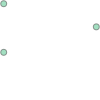

In [5]:
destinations

In [6]:
nearest_geoms = nearest_points(orig, destinations)

In [7]:
type(nearest_geoms)

tuple

In [8]:
print(nearest_geoms)

(<shapely.geometry.point.Point object at 0x7fceadba6750>, <shapely.geometry.point.Point object at 0x7fceadba6850>)


In [9]:
print(nearest_geoms[0])

POINT (1 1.67)


In [13]:
print(nearest_geoms[1])

POINT (0 1.45)


In [17]:
# Define filepaths
fp1 = "/content/PKS_suuralue.kml"
fp2 = "/content/addresses.shp"

In [18]:
# Enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [19]:
# Read in data with geopandas
df1 = gpd.read_file(fp1, driver='KML')
df2 = gpd.read_file(fp2)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:565: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [20]:
# District polygons:
df1.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


In [21]:
# Address points:
df2.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93017 60.16837)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.94189 60.16987)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.97740 60.18736)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.09196 60.21448)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.92148 60.15658)


In [22]:
df1 = df1.to_crs(epsg=3067)
df2 = df2.to_crs(epsg=3067)

In [23]:
df1['centroid'] = df1.centroid
df1.head()

,Name,Description,geometry,centroid
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764...",POINT (375676.529 6658405.261)
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677...",POINT (365520.906 6675893.101)
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711...",POINT (367400.175 6681941.088)
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766...",POINT (372191.037 6687785.458)
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753...",POINT (375678.189 6670243.076)


In [36]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [37]:
unary_union = df2.unary_union
print(unary_union)

MULTIPOINT (381509.3114647456 6678279.695881805, 381649.1435481719 6681009.373053129, 382108.7526298796 6678084.49032345, 382478.1415724767 6680048.201995307, 382813.2289085644 6678976.943536234, 383271.5036574116 6677528.499087724, 384626.2727378064 6670664.629381315, 384630.5635999594 6670942.089551031, 384851.2341996105 6671596.276833341, 385149.4478367225 6671962.669661295, 385352.288437208 6672079.772448166, 385434.5699603938 6675331.866078245, 385804.9853879581 6672108.604159364, 385843.7791171923 6672254.599359834, 386087.1067288672 6672327.641223467, 386259.1774244351 6673155.367903784, 386340.6675485576 6677860.971128643, 386922.0168165897 6674082.547347217, 387403.8846847538 6678661.661857004, 387834.3668702977 6673995.246252355, 388917.6086897013 6680240.421152136, 389470.0504685062 6674058.757596405, 389999.1689588365 6681077.154985747, 390724.8491512584 6674663.427798985, 390954.0967866234 6682372.571798013, 391367.1513718282 6683698.531263099, 391482.2831021842 6675671.50

In [38]:
df1["nearest_loc"] = df1.apply(get_nearest_values, other_gdf=df2, point_column="centroid", axis=1)

In [39]:
df1["nearest_loc"] = df1.apply(get_nearest_values, other_gdf=df2, point_column="centroid", value_column="id", axis=1)

In [40]:
df1.head()

,Name,Description,geometry,centroid,nearest_loc
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764...",POINT (375676.529 6658405.261),1005
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677...",POINT (365520.906 6675893.101),1020
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711...",POINT (367400.175 6681941.088),1017
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766...",POINT (372191.037 6687785.458),1017
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753...",POINT (375678.189 6670243.076),1005
